# Classified distribution

Let us study the distribution of a quantitative variable using classified distribution. Classified distributions can be expressed as frequency tables or histograms.

In [1]:
### Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Style has effect on the layout of the graphics.
### All styles available can be listed with the command plt.style.available
### Here the following style is used

plt.style.use('seaborn-whitegrid')

In [2]:
### Open the data

df = pd.read_excel('http://myy.haaga-helia.fi/~menetelmat/Data-analytiikka/Teaching/data1_en.xlsx')

### Let's take a peek at the data

df.head()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
### First we define boundaries of classes in order to classify the salaries
### Alternatively, the number of classes can be given

boundaries = [1000, 2000, 3000, 4000, 7000]

### Add a column for salary level to the data
### Parameter for bins is the abovedefined list named boundaries

df['salary_group'] = pd.cut(df['salary'], bins = boundaries)

### There is now a new column on the right in the data

df.head()

,number,sex,age,family,education,empl_years,salary,management,colleagues,environment,salary_level,duties,occu_health,timeshare,gym,massage,salary_group
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(3000, 4000]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(2000, 3000]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(1000, 2000]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(2000, 3000]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(2000, 3000]"


In [15]:
### Next calculate the counts in each salary group

df1 = pd.crosstab(df['salary_group'], 'Count')

### View the result. You maybe agree that some polishing is called for.

### Remove the header

df1.columns.name = ''

### Add percentages

n = df1['Count'].sum()
df1['Per cent'] = df1 / n * 100

### Add the row for totals. 
### Note that any column of a dataframe can only have type information!
### For that, we first change the salary groups from category into string.

df1.index = df1.index.astype(str)

df1.loc['Total'] = df1.sum()

### Finally, we revise the layout.

df1.style.format({'Count' : '{:.0f}', 'Per cent' : '{:.1f} %'})

,Count,Per cent
salary_group,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %
Total,82,100.0 %


### Histogram

Histogram is a quick way to view a classified distribution. For a histogram there is no need to first calculate a classification table for it.

Text(0, 0.5, 'Number, n=82')

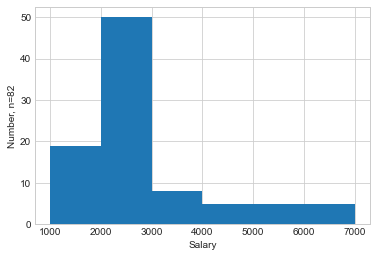

In [17]:
### Let's use the abovedefined group boundaries. 

df['salary'].hist(bins = boundaries)

### Chart axes definitions

plt.xlabel('Salary')
plt.ylabel('Number, n=' + str(n))

### Further information

<UL>
    <LI><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html</a></LI>
   <LI><a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html">https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html</a></LI>
    <LI><a href="https://numpy.org/doc/stable/reference/generated/numpy.ones.html">https://numpy.org/doc/stable/reference/generated/numpy.ones.html</a></LI>
</UL>

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>